# Continuous Optimization


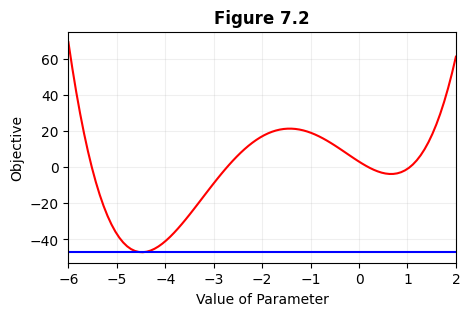

In [58]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline
def plot(x, y, title:str='', ylabel:str='', xlabel:str=''):
    plt.figure(figsize=(5,3))
    plt.title(title, fontweight='bold')
    plt.plot(x, y, color='r')
    plt.grid(True, alpha=0.2)
    plt.axhline(y.min(), color='b')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xlim(left=x_vals.min(), right=x_vals.max())
    plt.show()

def function(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

x_vals = torch.linspace(-6, 2, 100, requires_grad=False)
plot(x_vals, function(x_vals), title='Figure 7.2',ylabel='Objective', xlabel='Value of Parameter')

## Optimization Using Gradient Descent
$$\min_xf(x)$$
Here $f:\mathbb{R}^d\rightarrow\mathbb{R}$ is the objective function.

C:\Users\super\AppData\Local\Temp\ipykernel_32348\275553156.py:58: RuntimeWarning: invalid value encountered in log
  plt.contour(X,Y, np.log(Z+1), levels=20, alpha=0.6)


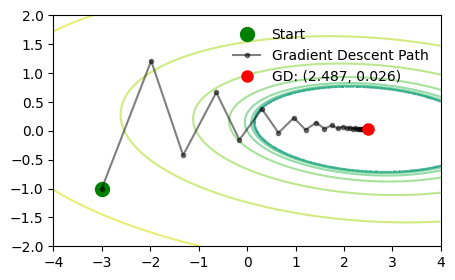

: 

In [ ]:
from abc import ABC, abstractmethod
from typing import Callable, List
import torch
import numpy as np

class DescentMethod(ABC):
    @abstractmethod
    def init(self, f: Callable, x0: torch.Tensor):
        pass
    
    @abstractmethod
    def step(self, f: Callable, x: torch.Tensor) -> torch.Tensor:
        pass

def IteratedDescent(method: DescentMethod, f: Callable,
                    x0: torch.Tensor, k_max: int = 1000) -> List[torch.Tensor]:
    method.init(f, x0)
    x = x0.clone().detach().requires_grad_(True)  # Enable autograd
    history = [x.clone().detach()]
    for _ in range(k_max):
        # Compute loss and gradients
        loss = f(x)
        loss.backward()  # Autodiff computes gradients
        with torch.no_grad():  # Temporarily disable gradient tracking
            x = method.step(f, x)
            x.requires_grad_(True)  # Re-enable for next iteration
        history.append(x.clone().detach())
    return x, history

class GradientDescent(DescentMethod):
    def __init__(self, alpha: float = 0.02):
        self.alpha = alpha

    def init(self, f: Callable, x0: torch.Tensor):
        return self
    
    def step(self, f: Callable, x: torch.Tensor) -> torch.Tensor:
        return x - self.alpha * x.grad


def quadratic_function(x)-> torch.Tensor:
    A = torch.tensor([[2.0,1.0], [1.0,20.0]])
    b = torch.tensor([5.0, 3.0])
    return 0.5*x.T @ A @ x - b @ x


x0 = torch.tensor([-3.0, -1.0], dtype=torch.float32)
gd = GradientDescent(alpha=0.085)
result, history = IteratedDescent(gd, quadratic_function, x0, k_max=1000)

history_ = np.array(history)
result_ = result.detach().numpy()
plt.figure(figsize=(5,3))
x_range = np.linspace(-4, 4, 1000)
y_range = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x_range, y_range)
Z = 0.5 * (2*X**2 + 2*X*Y + 20*Y**2) - 5*X - 3*Y
plt.contour(X,Y, np.log(Z+1), levels=20, alpha=0.6)
plt.plot(x0[0], x0[1], 'go', markersize=10, label='Start')
plt.plot(history_[:,0], history_[:,1], '.-', color='black', alpha=0.5,
         label='Gradient Descent Path') # optimization history
plt.plot(result_[0], result_[1], 'ro', markersize=8, 
         label=f'GD: ({result_[0]:.3f}, {result_[1]:.3f})')
plt.legend(framealpha=0)
plt.show()

When the surface is a long thin valley the problem is poorly conditioned.